# **Part 1: Cleaning, pre-processing and initial visualisations**


## **Age standardised smoking prevalence table**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#import the age standardised table
age_standard = pd.read_csv('/content/drive/MyDrive/DataScientest/Tobacco Project Jef/Original tables from WHO/Age_standardised_smoking_prevalance.csv')

In [ ]:
#Rename the columns
age_standard = age_standard.rename({'Unnamed: 0': 'Region', 'Unnamed: 1': 'Year', 'Estimate of current tobacco use prevalence (%) (age-standardized rate)': 'Overall use', 'Estimate of current tobacco use prevalence (%) (age-standardized rate).1': 'Male',
                                                'Estimate of current tobacco use prevalence (%) (age-standardized rate).2': 'Female'}, axis = 1)

#Drop the first row with redundant column names
age_standard = age_standard.drop(index = 0)

#Create a new reduced Dataframe including just the columns you need
age_standard = age_standard[['Region', 'Year', 'Overall use', 'Male', 'Female']].copy()

#Convert the values in Estimate_tobacco_use_prevalence to single numbers
age_standard['Overall use'] = age_standard['Overall use'].str.split(' ').str[0]

#Change them to float
age_standard['Overall use'] = age_standard['Overall use'].astype(float)

#Do the same for the 'Estimate_tobacco_use_prevalence_male' and 'Estimate_tobacco_use_prevalence_female' columns
age_standard['Male'] = age_standard['Male'].str.split(' ').str[0]
age_standard['Female'] = age_standard['Female'].str.split(' ').str[0]

#Change the 'Male' and 'Female' columns to type float
age_standard['Male'] = age_standard['Male'].astype(float)
age_standard['Female'] = age_standard['Female'].astype(float)

#Convert the 'Year' column to type int
age_standard['Year'] = age_standard['Year'].astype(int)


In [ ]:
display(age_standard.head())
age_standard.info()

,Region,Year,Overall use,Male,Female
1,Afghanistan,2030,19.4,34.1,4.7
2,Afghanistan,2025,21.3,36.8,5.9
3,Afghanistan,2022,22.7,38.7,6.8
4,Afghanistan,2021,23.2,39.3,7.1
5,Afghanistan,2020,23.7,40.0,7.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 1 to 1650
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       1650 non-null   object 
 1   Year         1650 non-null   int64  
 2   Overall use  1650 non-null   float64
 3   Male         1650 non-null   float64
 4   Female       1650 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 64.6+ KB


In [ ]:
#Put the year into ascending order by country
age_standard = age_standard.sort_values(by=['Region', 'Year'], ascending=[True, True])

#reset index
age_standard = age_standard.reset_index(drop=True)

#check for missing values
age_standard.isna().sum()

,0
Region,0
Year,0
Overall use,0
Male,0
Female,0


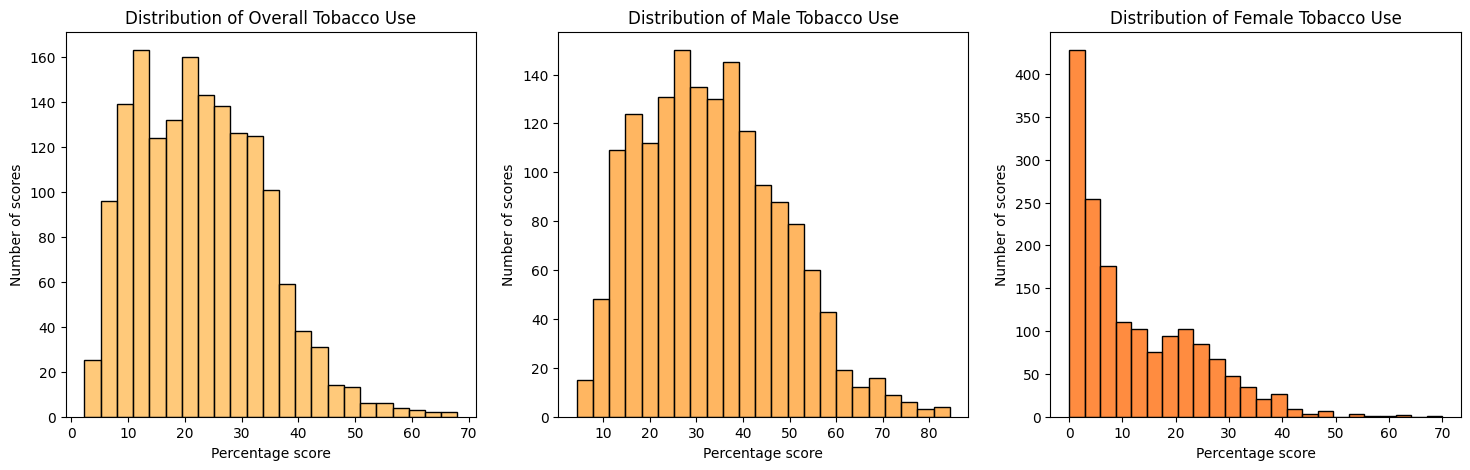

In [ ]:
#create histograms to display distibution of the 3 target variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(age_standard['Overall use'], color = '#FFB84D', ax=axes[0])
axes[0].set_title('Distribution of Overall Tobacco Use')
axes[0].set_xlabel('Percentage score')
axes[0].set_ylabel('Number of scores')
sns.histplot(age_standard['Male'], color = '#FF9E2C', ax=axes[1])
axes[1].set_title('Distribution of Male Tobacco Use')
axes[1].set_xlabel('Percentage score')
axes[1].set_ylabel('Number of scores')
sns.histplot(age_standard['Female'], color = '#FF6600', ax=axes[2])
axes[2].set_title('Distribution of Female Tobacco Use')
axes[2].set_xlabel('Percentage score')
axes[2].set_ylabel('Number of scores');

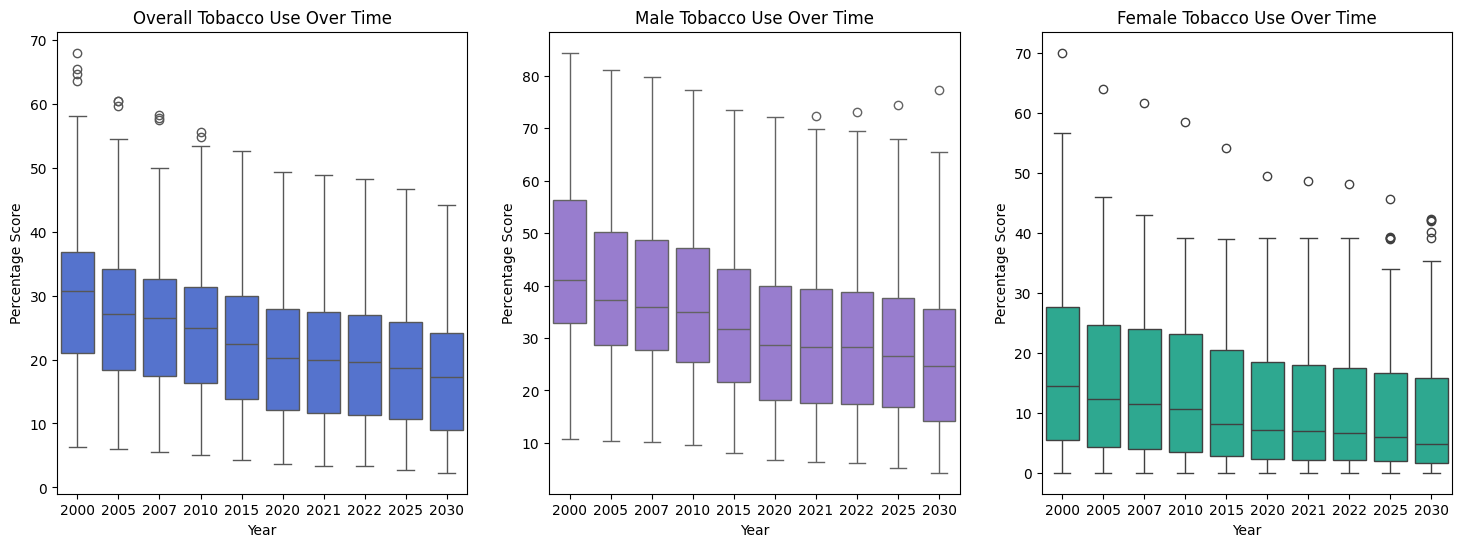

In [ ]:
#create boxplots to display distribution of the target variables over time
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x= 'Year', y= 'Overall use', data = age_standard, ax=axes[0], color='#4169E1')
axes[0].set_title('Overall Tobacco Use Over Time')
axes[0].set_ylabel('Percentage Score')
sns.boxplot(x= 'Year', y= 'Male', data = age_standard, ax=axes[1], color= '#9370DB')
axes[1].set_title('Male Tobacco Use Over Time')
axes[1].set_ylabel('Percentage Score')
sns.boxplot(x= 'Year', y= 'Female', data = age_standard, ax=axes[2] ,color= '#1ABC9C')
axes[2].set_title('Female Tobacco Use Over Time')
axes[2].set_ylabel('Percentage Score');

In [ ]:
#Identify the countries with the highest tobacco use prevalence scores
tobacco_use_most = age_standard.sort_values(by='Overall use', ascending= False)
top_countries = tobacco_use_most.head(20)
top_users = []
for i in top_countries['Region']:
  top_users.append(i)
print(top_users)

['Kiribati', 'Myanmar', 'Nepal', 'Nauru', 'Myanmar', 'Kiribati', 'Nauru', 'Myanmar', 'Bangladesh', 'Nauru', 'Kiribati', 'Greece', 'India', 'Nauru', 'Myanmar', 'Nepal', 'Papua New Guinea', 'Kiribati', 'Madagascar', 'Timor-Leste']


In [ ]:
top_users = ['Kiribati', 'Myanmar', 'Nepal', 'Nauru', 'Bangladesh', 'Greece', 'India', 'Papua New Guinea', 'Madagascar', 'Timor-Leste']
heaviest_users = age_standard.loc[age_standard['Region'].isin(top_users)]

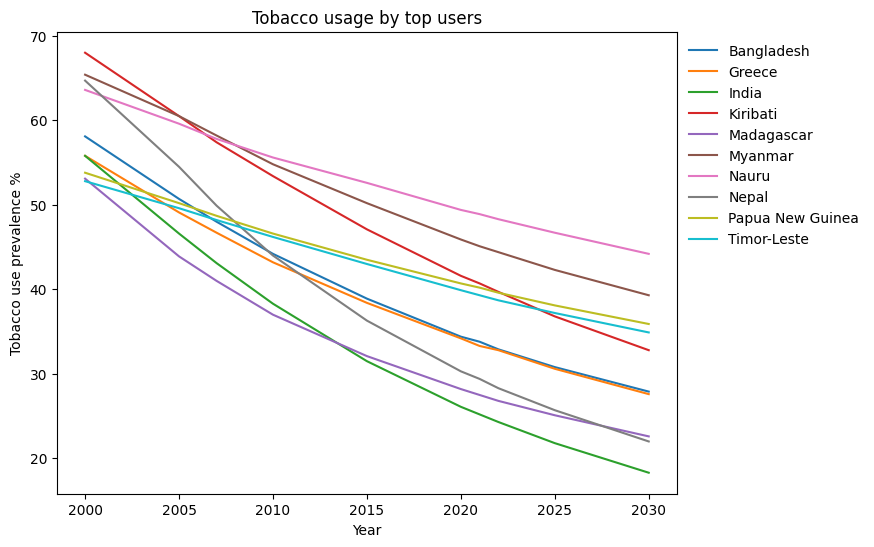

In [ ]:
#create lineplot to show the top tobacco users tobacco usage over time
plt.figure(figsize=(8, 6))
sns.lineplot(x= 'Year', y = 'Overall use', hue = 'Region', data= heaviest_users)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.title('Tobacco usage by top users')
plt.ylabel('Tobacco use prevalence %');

In [ ]:
import plotly.express as px

#create an interactive choropleth map to show show tobacco use prevalence changes over time
age_filtered = age_standard[(age_standard['Year'] < 2023) & (age_standard['Year'] > 2005)]
age_filtered = age_filtered.sort_values(by="Year", ascending=True)

min_value = age_filtered["Overall use"].min()
max_value = age_filtered["Overall use"].max()

fig = px.choropleth(age_filtered, locations="Region", locationmode="country names",
                    color="Overall use", animation_frame="Year",
                    color_continuous_scale="Viridis",
                    range_color=[min_value, max_value])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1000,
                  height=600,
                 title=dict(
        text="Age standardised tobacco use")
)
fig.show()

## **Non-age standardised smoking prevalence table**

In [ ]:
#import the non-age standardised table
non_age_standard = pd.read_csv('/content/drive/MyDrive/DataScientest/Tobacco Project Jef/Original tables from WHO/Non_age_standardised_smoking_prevalence.csv')

In [ ]:
#rename the columns
non_age_standard = non_age_standard.rename({'Unnamed: 0': 'Region', 'Unnamed: 1': 'Year', 'Estimate of current tobacco use prevalence (%)': 'Overall use (non_std)', 'Estimate of current tobacco use prevalence (%).1': 'Male (non_std)',
                                                'Estimate of current tobacco use prevalence (%).2': 'Female (non_std)'}, axis = 1)

#drop row 0 as redundant
non_age_standard = non_age_standard.drop(index = 0)

#Create a new reduced Dataframe including just the columns you need
non_age_standard = non_age_standard[['Region', 'Year', 'Overall use (non_std)', 'Male (non_std)', 'Female (non_std)']].copy()

#Convert the values in Estimate_tobacco_use_prevalence to single numbers
non_age_standard['Overall use (non_std)'] = non_age_standard['Overall use (non_std)'].str.split(' ').str[0]

#Change them to float
non_age_standard['Overall use (non_std)'] = non_age_standard['Overall use (non_std)'].astype(float)

#Do the same for the 'Estimate_tobacco_use_prevalence_male' and 'Estimate_tobacco_use_prevalence_female' columns
non_age_standard['Male (non_std)'] = non_age_standard['Male (non_std)'].str.split(' ').str[0]
non_age_standard['Female (non_std)'] = non_age_standard['Female (non_std)'].str.split(' ').str[0]

#Change the 'Male' and 'Female' columns to type float
non_age_standard['Male (non_std)'] = non_age_standard['Male (non_std)'].astype(float)
non_age_standard['Female (non_std)'] = non_age_standard['Female (non_std)'].astype(float)

#Convert the 'Year' column to type int
non_age_standard['Year'] = non_age_standard['Year'].astype(int)

In [ ]:
display(non_age_standard.head())
#check for missing values
display(non_age_standard.isna().sum())
non_age_standard.info()

,Region,Year,Overall use (non_std),Male (non_std),Female (non_std)
1,Afghanistan,2030,18.9,33.9,4.2
2,Afghanistan,2025,20.8,36.5,5.2
3,Afghanistan,2022,22.1,38.3,5.9
4,Afghanistan,2021,22.6,39.0,6.2
5,Afghanistan,2020,23.1,39.7,6.5


,0
Region,0
Year,0
Overall use (non_std),0
Male (non_std),0
Female (non_std),0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 1 to 1650
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 1650 non-null   object 
 1   Year                   1650 non-null   int64  
 2   Overall use (non_std)  1650 non-null   float64
 3   Male (non_std)         1650 non-null   float64
 4   Female (non_std)       1650 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 64.6+ KB


## **Tobacco Control Table**

In [ ]:
tob_ctrl = pd.read_csv('/content/drive/MyDrive/DataScientest/Tobacco Project Jef/Original tables from WHO/Tobacco_control_programs.csv')

In [ ]:
# Replacing  values, dropping irrelevant columns
tob_ctrl['Number of full-time equivalent staff in national agency'] = tob_ctrl['Number of full-time equivalent staff in national agency'].replace(['. . .', 'Not applicable'], np.nan)
tob_ctrl['Number of full-time equivalent staff in national agency'] = tob_ctrl['Number of full-time equivalent staff in national agency'].astype(float)
tob_ctrl = tob_ctrl.drop(columns = ['Annual budget for tobacco control in currency reported', 'National tobacco control budget - currency reported', 'Budget year'], axis = 1)
tob_ctrl = tob_ctrl.rename({'Countries, territories and areas': 'Region', 'Government objectives on tobacco control exist' : 'Objectives exist', 'National agency for tobacco control exists' : 'Ntl agency exists',
                            'Number of full-time equivalent staff in national agency': 'No. staff'}, axis =1)
tob_ctrl['No. staff'] = tob_ctrl['No. staff'].round()
tob_ctrl = tob_ctrl.sort_values(by=['Region', 'Year'], ascending=[True, True])
tob_ctrl = tob_ctrl.reset_index(drop=True)
tob_ctrl['Ntl agency exists'] = tob_ctrl['Ntl agency exists'].replace('. . .', 'Yes')
tob_ctrl['Objectives exist'] = tob_ctrl['Objectives exist'].replace('. . .', 'Yes')

In [ ]:
display(tob_ctrl.head())
tob_ctrl.info()

#The missing values in No. staff were to be handled after the train, test, split to avoid data leakage (in the end we decided not to use any of these columns anyway)

,Region,Year,Objectives exist,Ntl agency exists,No. staff
0,Afghanistan,2008,No,Yes,NaN
1,Afghanistan,2010,No,Yes,NaN
2,Afghanistan,2012,No,Yes,NaN
3,Afghanistan,2014,Yes,Yes,NaN
4,Afghanistan,2016,Yes,Yes,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             1560 non-null   object 
 1   Year               1560 non-null   int64  
 2   Objectives exist   1560 non-null   object 
 3   Ntl agency exists  1560 non-null   object 
 4   No. staff          1115 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 61.1+ KB


## **Cigarette Price Table**

In [ ]:
price = pd.read_csv('/content/drive/MyDrive/Tobacco Project/Initial Data/CigarettePriceRaw.csv')

In [ ]:
#selecting relevant columns to use, converting values
price = price[price['Dim2'] == 'In international dollars (At Purchasing Power Parity)']

price = price[['Location', 'Period', 'Value']]

price = price.rename(columns={'Location': 'Region', 'Period': 'Year','Value': 'Cigarette_price'})

price = price.drop(price[
                   (price.Region == 'Cook Islands') |
                   (price.Region == 'Cuba') |
                   (price.Region == "Democratic People's Republic of Korea") |
                   (price.Region == 'Monaco') |
                   (price.Region == 'Niue')].index)

price["Cigarette_price"] = pd.to_numeric(price["Cigarette_price"], errors = 'coerce')

price["Cigarette_price"] = price.groupby("Region")["Cigarette_price"].transform(lambda x: x.fillna(x.mean()))

price.Cigarette_price = price.Cigarette_price.round(2)

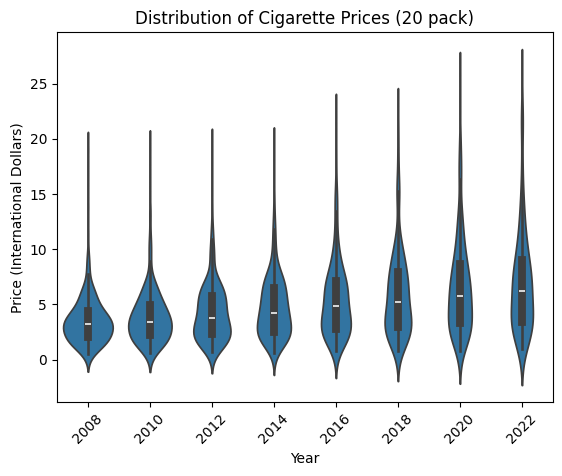

In [ ]:
#creating visualisation for distribution of cigarette prices
sns.violinplot(x="Year", y="Cigarette_price", data=price)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Price (International Dollars)")
plt.title("Distribution of Cigarette Prices (20 pack)")
plt.show()

In [ ]:
#create visualisation for cigarette prices per year

price["Jittered_Year"] = price["Year"] + np.random.uniform(-0.5, 0.5, size=len(price["Year"]))

top = ['Singapore', 'Seychelles', 'Jamaica', 'Sri Lanka', 'Ireland', 'Australia', 'Turkmenistan', 'New Zealand']

fig = px.scatter(
    price,
    x="Jittered_Year",  # Use jittered year to prevent overlapping
    y="Cigarette_price",
    color="Region",
    hover_data=["Region"],
    title="Cigarette Prices per year",
    opacity=0.7,
     color_discrete_map={
                "Seychelles": "red",
                "Turkmenistan": "green"}
)

fig.update_layout(
    width=1000,
    height=600,
    xaxis_title="Year",
    yaxis_title="Price (International Dollars)",
    showlegend=True,
    legend = dict(title = "Top countries")
)  # Hide legend to prevent clutter

for trace in fig.data:
    if trace.name not in top:
        trace.showlegend = False

fig.show()

## **MPOWER Table**

In [ ]:
emp = pd.read_csv('/content/drive/MyDrive/Tobacco Project/Initial Data/MPOWER.csv')

In [ ]:
#no NA in info but "not applicable" in checking head (row 8 and 9)
display(emp.head(10))
emp.info()
#doesnt recognize NA as datatype object--> change to int

,Region,Year,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign
0,Afghanistan,2022,2,5,3,2,5,1,2
1,Afghanistan,2020,2,5,3,2,5,2,2
2,Afghanistan,2018,2,5,3,2,5,2,2
3,Afghanistan,2016,2,5,3,4,5,2,2
4,Afghanistan,2014,2,3,3,2,4,3,2
5,Afghanistan,2012,1,3,3,2,4,2,2
6,Afghanistan,2010,1,3,3,2,4,2,1
7,Afghanistan,2008,1,3,3,2,4,2,0
8,Afghanistan,2007,1,3,3,2,4,0,0
9,Albania,2022,2,5,4,5,5,4,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Region             1755 non-null   object
 1   Year               1755 non-null   int64 
 2   Monitor            1755 non-null   int64 
 3   exposure_protect   1755 non-null   int64 
 4   cessation_support  1755 non-null   int64 
 5   risk_warning       1755 non-null   int64 
 6   advertisement_ban  1755 non-null   int64 
 7   tax_increase       1755 non-null   int64 
 8   media_campaign     1755 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 123.5+ KB


In [ ]:
#Rename Columnnames
emp=emp.rename(columns={"Countries, territories and areas": "Region", "Protect from tobacco smoke": "exposure_protect", "Offer help to quit tobacco use":"cessation_support","Warn about the dangers of tobacco":"risk_warning","Enforce bans on tobacco advertising":"advertisement_ban","Raise taxes on tobacco":"tax_increase","Anti-tobacco mass media campaigns":"media_campaign"})
emp.head(1)

,Region,Year,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign
0,Afghanistan,2022,2,5,3,2,5,1,2


In [ ]:
#change "Not applicable" to 0 (while object)
emp[["tax_increase", "media_campaign"]] = emp[["tax_increase", "media_campaign"]].replace("Not applicable", 0)

#change columns 8 and 9 in int
emp[['tax_increase', 'media_campaign']] = emp[['tax_increase', 'media_campaign']].astype(int)
# Calculate the percentage of missing values for 'Raise taxes on tobacco'
total_rows = len(emp)  # Get total number of rows in the dataset
missing_raised_taxes = emp["tax_increase"].isna().sum()  # Count missing values
NA_raised_taxes_percentage = (missing_raised_taxes / total_rows) * 100
print("Percentage of missing values in 'Raise taxes on tobacco':", NA_raised_taxes_percentage)

# Calculate the percentage of missing values for 'Anti-tobacco mass media campaigns'
missing_Anti_media = emp["tax_increase"].isna().sum()  # Count missing values
NA_Anti_media_percentage = (missing_Anti_media / total_rows) * 100
print("Percentage of missing values in 'Anti-tobacco mass media campaigns':", NA_Anti_media_percentage)


Percentage of missing values in 'Raise taxes on tobacco': 0.0
Percentage of missing values in 'Anti-tobacco mass media campaigns': 0.0


In [ ]:
#number of modalities per column error check:
display(emp["Region"].value_counts())
# object, see below

display(emp["Year"].value_counts())
# int:
display(emp["Monitor"].value_counts())
# int: --> as quality indicator

display(emp["exposure_protect"].value_counts())
#int: modalities:2,3,4,5 --> change to cat
display(emp["cessation_support"].value_counts())
#int: modalities:1,2,3,4,5 --> change to cat
display(emp["risk_warning"].value_counts())
#int: modalities:2,3,4,5 --> change to cat
display(emp["advertisement_ban"].value_counts())
#int: modalities:2,3,4,5 --> change to cat
display(emp["tax_increase"].value_counts())
#object:1,2,3,4,5, Not applicable --> change to 0
display(emp["media_campaign"].value_counts())
#object:1,2,3,4,5, Not applicable --> change to 0

,count
Region,
Afghanistan,9
Albania,9
Algeria,9
Andorra,9
Angola,9
...,...
Venezuela (Bolivarian Republic of),9
Viet Nam,9
Yemen,9


,count
Year,
2022,195
2020,195
2018,195
2016,195
2014,195
2012,195
2010,195
2008,195
2007,195


,count
Monitor,
4,644
2,497
3,376
1,238


,count
exposure_protect,
2,739
3,426
5,419
4,171


,count
cessation_support,
4,835
3,522
2,204
5,185
1,9


,count
risk_warning,
2,626
5,487
3,400
4,242


,count
advertisement_ban,
4,867
2,560
5,318
3,10


,count
tax_increase,
4,509
3,485
5,267
2,215
0,207
1,72


,count
media_campaign,
2,696
0,390
5,272
4,188
1,130
3,79


In [ ]:
#Change columns to numerical before replacing values(2 → 1, 3 → 2, 4 → 3, 5 → 4):
emp[["exposure_protect", "cessation_support", "risk_warning", "advertisement_ban","tax_increase","media_campaign"]] = emp[["exposure_protect", "cessation_support", "risk_warning", "advertisement_ban","tax_increase","media_campaign"]].apply(pd.to_numeric, errors="coerce")
print(emp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Region             1755 non-null   object
 1   Year               1755 non-null   int64 
 2   Monitor            1755 non-null   int64 
 3   exposure_protect   1755 non-null   int64 
 4   cessation_support  1755 non-null   int64 
 5   risk_warning       1755 non-null   int64 
 6   advertisement_ban  1755 non-null   int64 
 7   tax_increase       1755 non-null   int64 
 8   media_campaign     1755 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 123.5+ KB
None


In [ ]:
# replace values: 2 → 1, 3 → 2, 4 → 3, 5 → 4 (but only if the value is still the original and therefore a 5 can be found in any cell)
if emp[["exposure_protect", "cessation_support", "risk_warning", "advertisement_ban", "tax_increase", "media_campaign"]].isin([5]).any().any():
  emp[["exposure_protect", "cessation_support", "risk_warning", "advertisement_ban", "tax_increase", "media_campaign"]] = \
    emp[["exposure_protect", "cessation_support", "risk_warning", "advertisement_ban", "tax_increase", "media_campaign"]].replace({2: 1, 3: 2, 4: 3, 5: 4})
display(emp["media_campaign"].value_counts())

,count
media_campaign,
1,826
0,390
4,272
3,188
2,79


In [ ]:
# Change score variables from num to cat
emp[["Monitor","exposure_protect", "cessation_support", "risk_warning", "advertisement_ban","tax_increase","media_campaign"]] = emp[["Monitor","exposure_protect", "cessation_support", "risk_warning", "advertisement_ban","tax_increase","media_campaign"]].astype("category")
print(emp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Region             1755 non-null   object  
 1   Year               1755 non-null   int64   
 2   Monitor            1755 non-null   category
 3   exposure_protect   1755 non-null   category
 4   cessation_support  1755 non-null   category
 5   risk_warning       1755 non-null   category
 6   advertisement_ban  1755 non-null   category
 7   tax_increase       1755 non-null   category
 8   media_campaign     1755 non-null   category
dtypes: category(7), int64(1), object(1)
memory usage: 41.0+ KB
None


Visualization

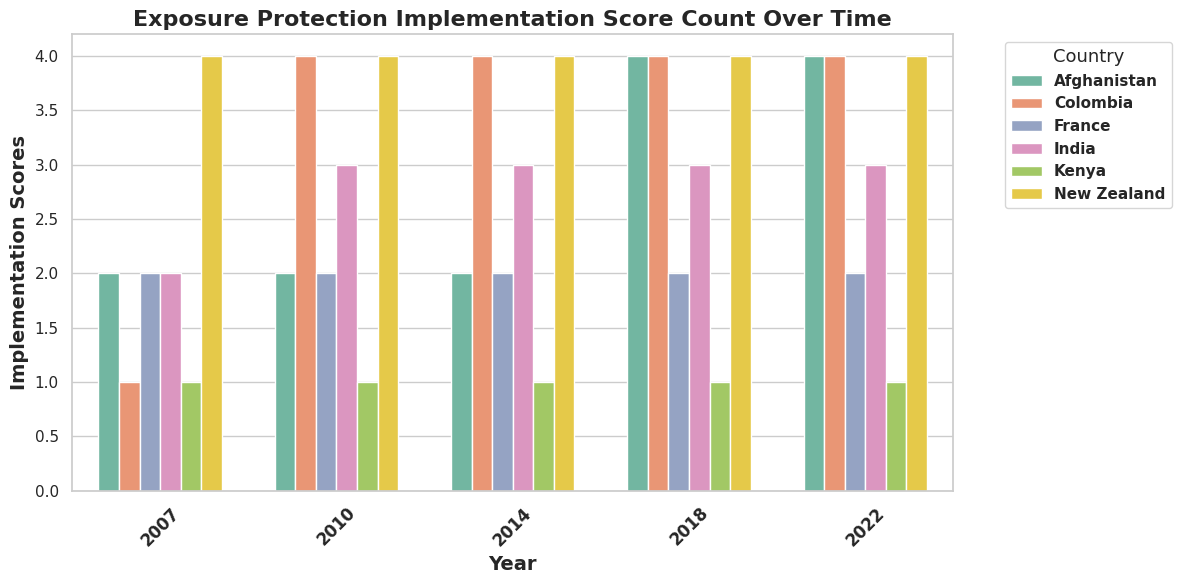

In [ ]:
#Barplot for policy: 'exposure_protect'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# List of selected countries and years
countries = ["Afghanistan", "Colombia", "France", "India", "Kenya", "New Zealand"]
years = [2007, 2010, 2014, 2018, 2022]


# Filter the data for the selected countries and specific years
emp_filtered = emp[(emp['Region'].isin(countries)) & (emp['Year'].isin(years))].copy()


# Convert 'exposure_protect' to integers
emp_filtered['exposure_protect'] = pd.to_numeric(emp_filtered['exposure_protect'], errors='coerce')

# Create a bar plot (or line plot) to show the adherence score for each country over time
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='exposure_protect', hue='Region', data=emp_filtered, palette='Set2', width=0.7)

# Customize the plot with bold text
plt.title('Exposure Protection Implementation Score Count Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Implementation Scores', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

# Modify the legend with bold text using 'prop'
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', prop={'weight': 'bold'})

plt.tight_layout()

# Show the plot
plt.show()



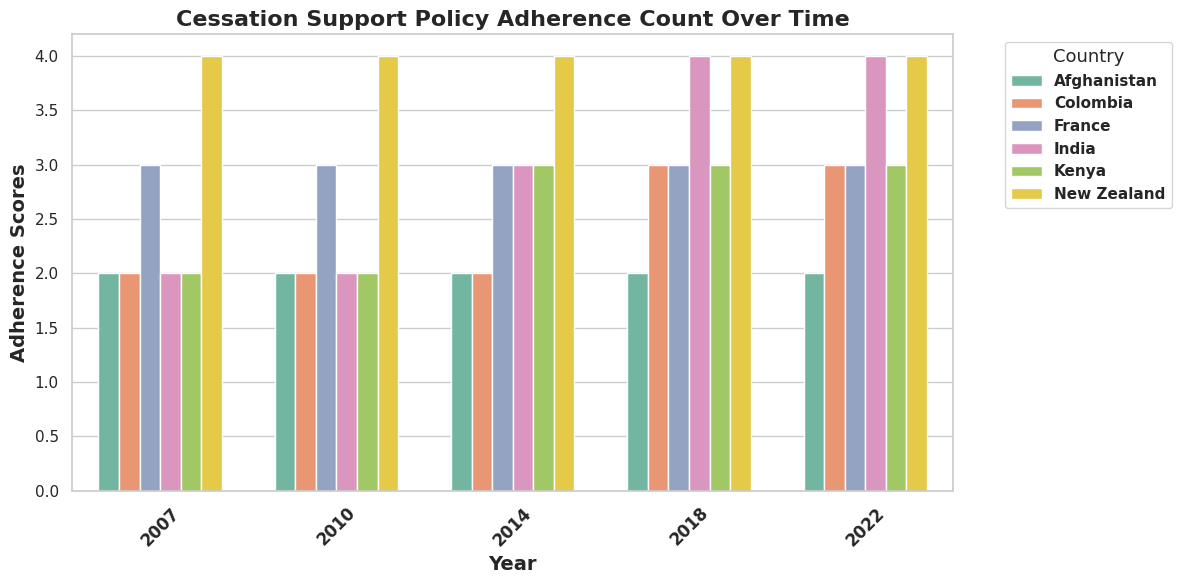

In [ ]:
#Barplot for policy: 'cessation_support'
# List of selected countries and years
countries = ["Afghanistan", "Colombia", "France", "India", "Kenya", "New Zealand"]
years = [2007, 2010, 2014, 2018, 2022]


# Filter the data for the selected countries and specific years
emp_filtered = emp[(emp['Region'].isin(countries)) & (emp['Year'].isin(years))].copy()


# Convert 'exposure_protect' to integers
emp_filtered['cessation_support'] = pd.to_numeric(emp_filtered['cessation_support'], errors='coerce')

# Create a bar plot (or line plot) to show the adherence score for each country over time
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='cessation_support', hue='Region', data=emp_filtered, palette='Set2', width=0.7)

# Customize the plot with bold text
plt.title('Cessation Support Policy Adherence Count Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Adherence Scores', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

# Modify the legend with bold text using 'prop'
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', prop={'weight': 'bold'})

plt.tight_layout()

# Show the plot
plt.show()


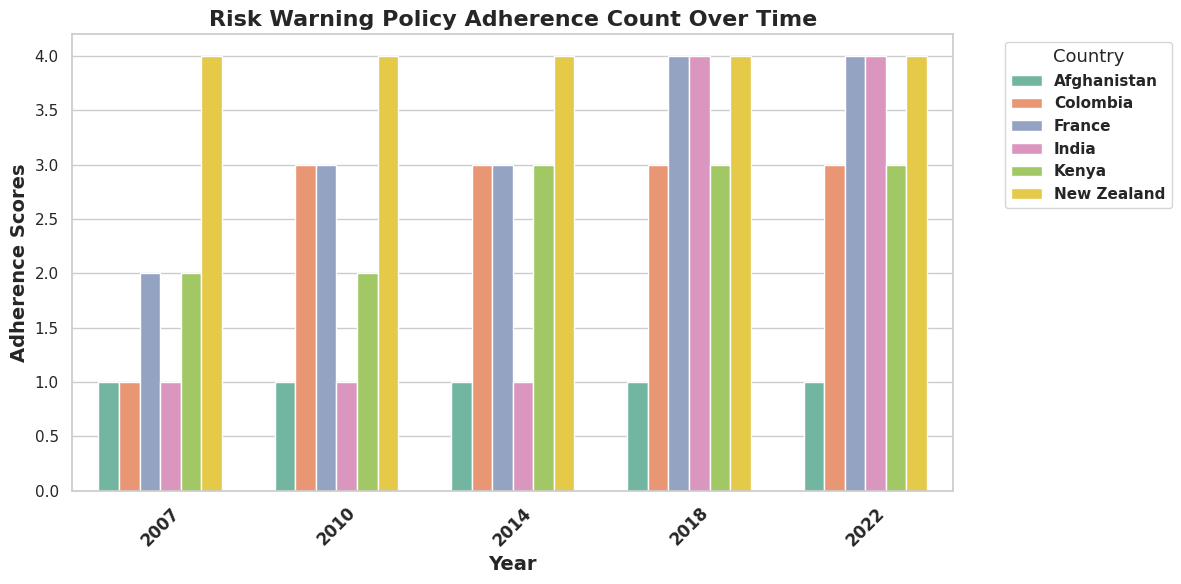

In [ ]:
#Barplot for policy: 'risk_warning'
# List of selected countries and years
countries = ["Afghanistan", "Colombia", "France", "India", "Kenya", "New Zealand"]
years = [2007, 2010, 2014, 2018, 2022]


# Filter the data for the selected countries and specific years
emp_filtered = emp[(emp['Region'].isin(countries)) & (emp['Year'].isin(years))].copy()


# Convert 'exposure_protect' to integers
emp_filtered['risk_warning'] = pd.to_numeric(emp_filtered['risk_warning'], errors='coerce')

# Create a bar plot (or line plot) to show the adherence score for each country over time
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='risk_warning', hue='Region', data=emp_filtered, palette='Set2', width=0.7)

# Customize the plot with bold text
plt.title('Risk Warning Policy Adherence Count Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Adherence Scores', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

# Modify the legend with bold text using 'prop'
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', prop={'weight': 'bold'})

plt.tight_layout()

# Show the plot
plt.show()

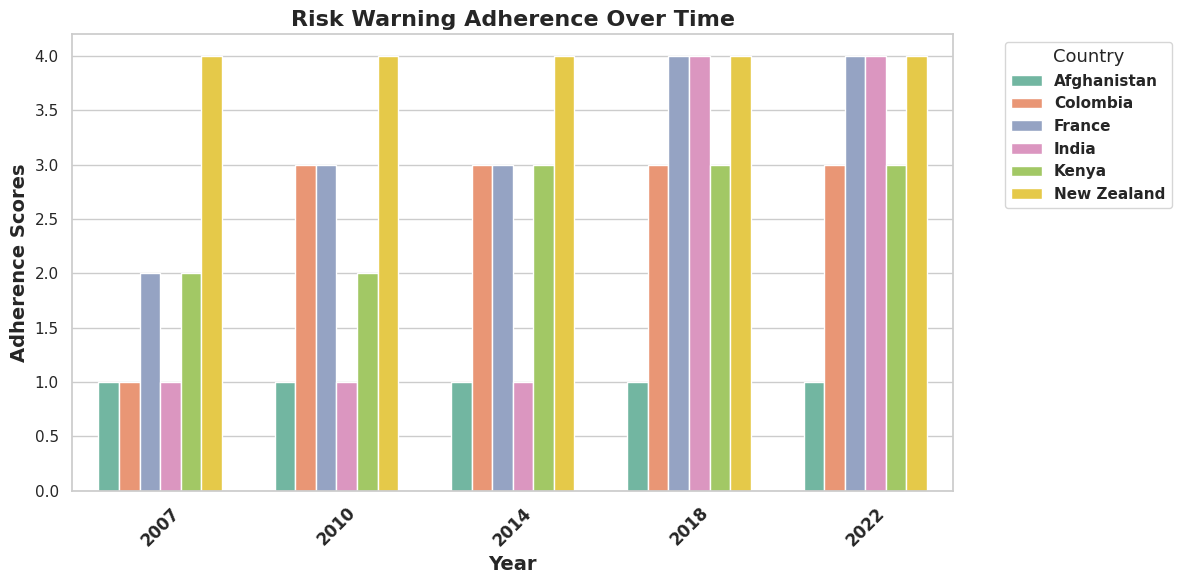

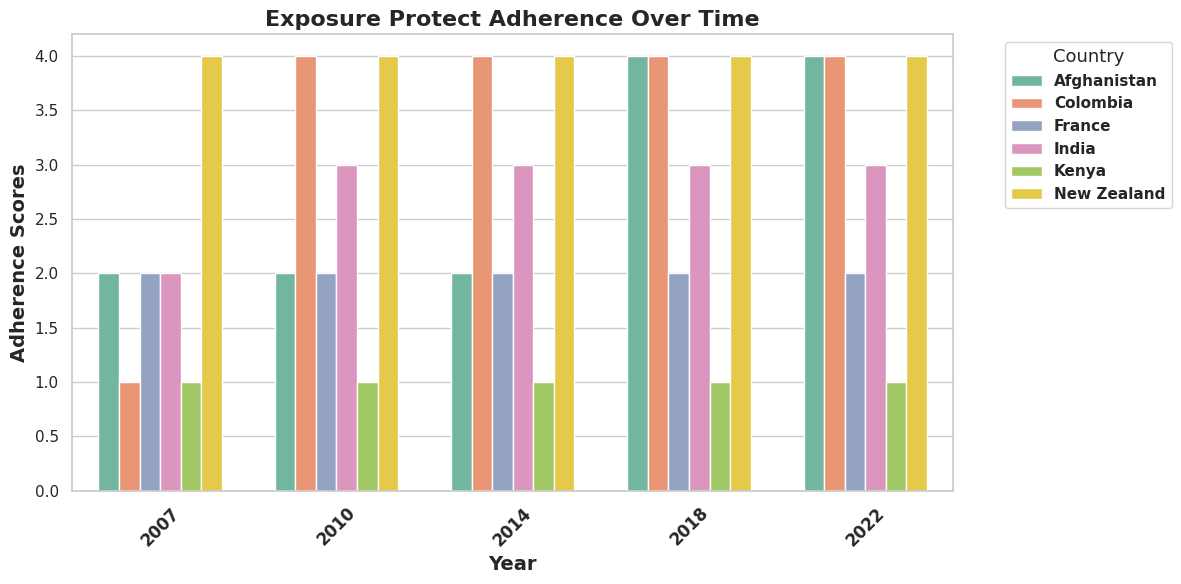

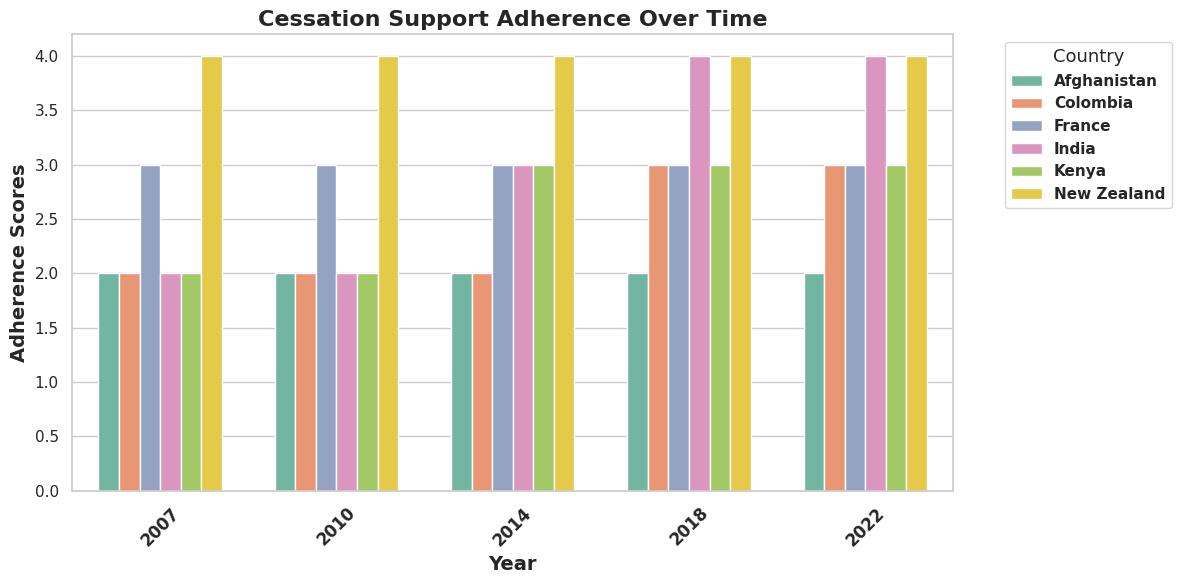

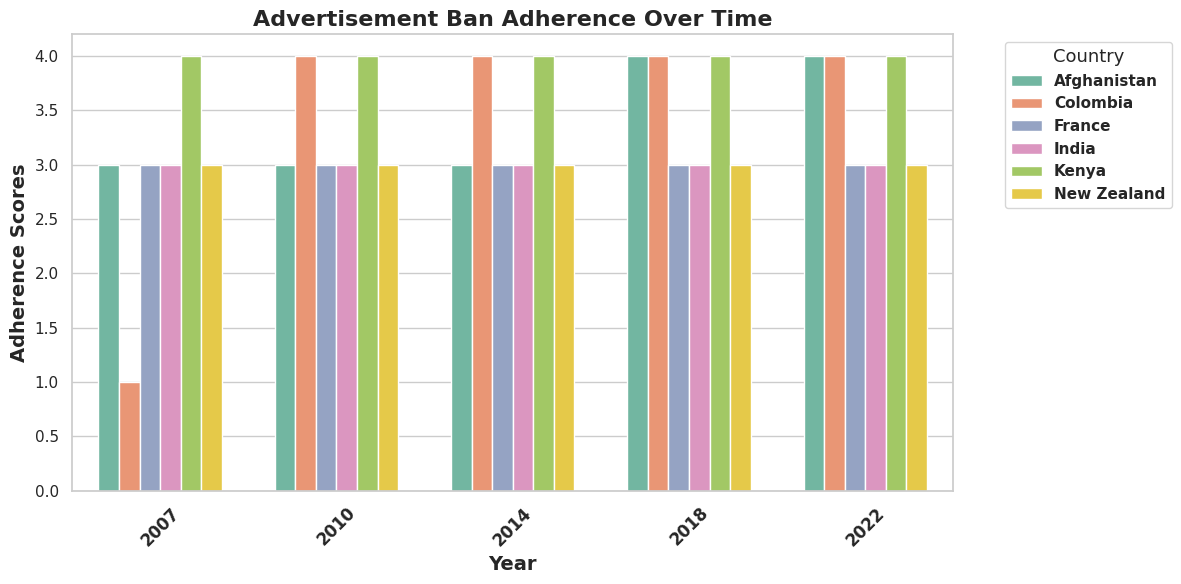

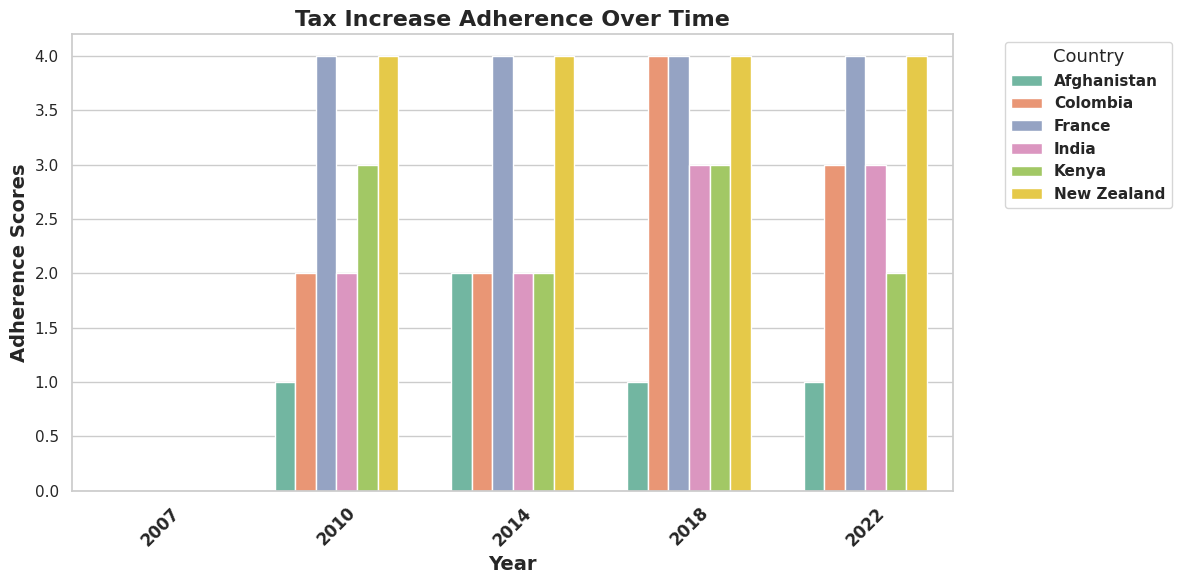

In [ ]:
# List of selected countries and years
countries = ["Afghanistan", "Colombia", "France", "India", "Kenya", "New Zealand"]
years = [2007, 2010, 2014, 2018, 2022]

# List of policies to generate plots for
policies = ['risk_warning', 'exposure_protect', 'cessation_support', 'advertisement_ban', 'tax_increase']

# Filter the data for the selected countries and specific years
emp_filtered = emp[(emp['Region'].isin(countries)) & (emp['Year'].isin(years))].copy()

# Loop through each policy and create a bar plot
for policy in policies:
    # Convert policy column to numeric values
    emp_filtered[policy] = pd.to_numeric(emp_filtered[policy], errors='coerce')

    # Create a bar plot for the current policy
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Year', y=policy, hue='Region', data=emp_filtered, palette='Set2', width=0.7)

    # Customize the plot with bold text
    plt.title(f'{policy.replace("_", " ").title()} Adherence Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Year', fontsize=14, fontweight='bold')
    plt.ylabel('Adherence Scores', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, fontsize=12, fontweight='bold')

    # Modify the legend with bold text using 'prop'
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', prop={'weight': 'bold'})

    plt.tight_layout()

    # Show the plot
    plt.show()


<ipython-input-43-90834019a375>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', prop={'weight': 'bold'})


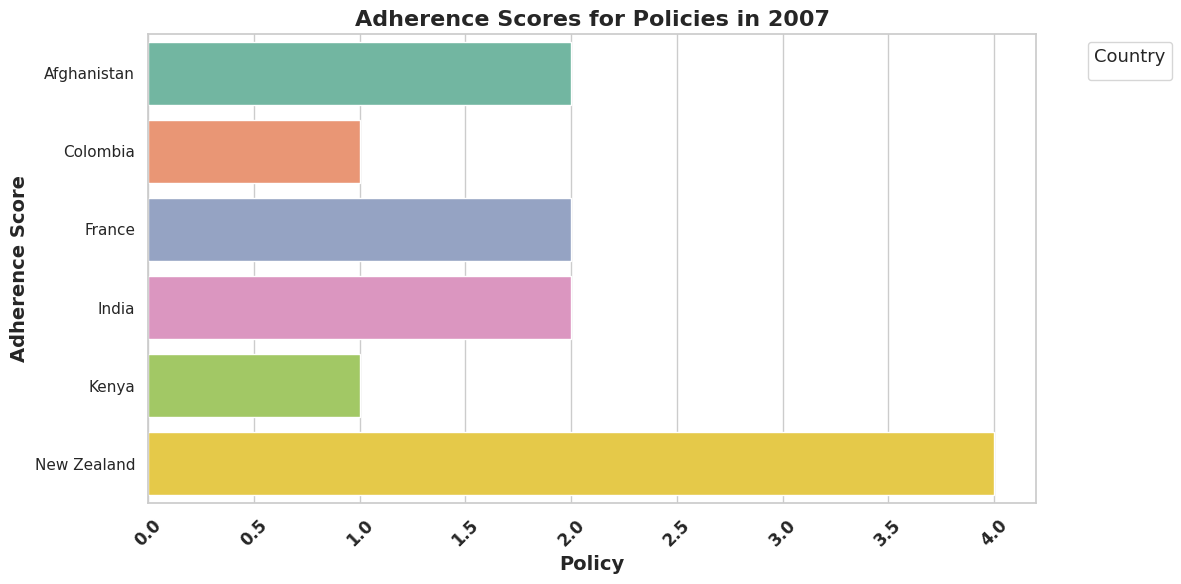

<ipython-input-43-90834019a375>:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', prop={'weight': 'bold'})


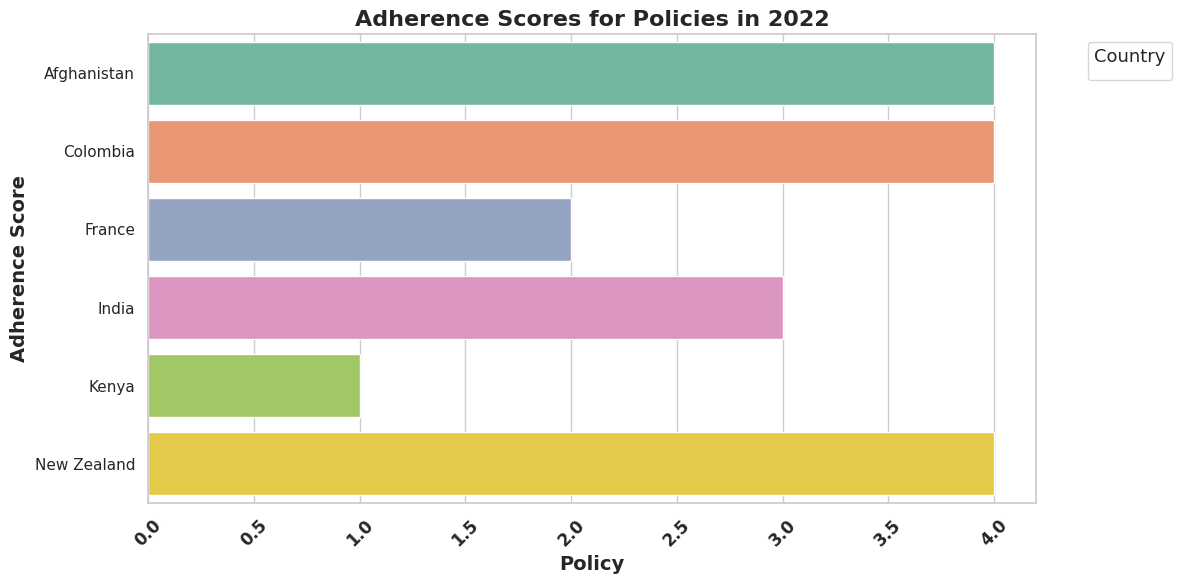

In [ ]:
# List of selected countries and policies
countries = ["Afghanistan", "Colombia", "France", "India", "Kenya", "New Zealand"]
policies = ['exposure_protect', 'cessation_support', 'risk_warning', 'advertisement_ban', 'tax_increase']

# Filter the data for the selected countries and the specific years (2007 and 2022)
emp_filtered_2007 = emp[(emp['Region'].isin(countries)) & (emp['Year'] == 2007)].copy()
emp_filtered_2022 = emp[(emp['Region'].isin(countries)) & (emp['Year'] == 2022)].copy()

# Convert the policies to numeric values if necessary
for policy in policies:
    emp_filtered_2007[policy] = pd.to_numeric(emp_filtered_2007[policy], errors='coerce')
    emp_filtered_2022[policy] = pd.to_numeric(emp_filtered_2022[policy], errors='coerce')

# Create the first barplot for the year 2007
plt.figure(figsize=(12, 6))
sns.barplot(x='exposure_protect', y='Region', data=emp_filtered_2007, hue='Region', palette='Set2')
plt.title('Adherence Scores for Policies in 2007', fontsize=16, fontweight='bold')
plt.xlabel('Policy', fontsize=14, fontweight='bold')
plt.ylabel('Adherence Score', fontsize=14, fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', prop={'weight': 'bold'})
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.tight_layout()

# Show the plot for 2007
plt.show()

# Create the second barplot for the year 2022
plt.figure(figsize=(12, 6))
sns.barplot(x='exposure_protect', y='Region', data=emp_filtered_2022, hue='Region', palette='Set2')
plt.title('Adherence Scores for Policies in 2022', fontsize=16, fontweight='bold')
plt.xlabel('Policy', fontsize=14, fontweight='bold')
plt.ylabel('Adherence Score', fontsize=14, fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize='13', prop={'weight': 'bold'})
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.tight_layout()

# Show the plot for 2022
plt.show()


In [ ]:
# Group data by country
emp_gr_country = emp.groupby("Region")

# Function to replace 0 with the valid scale value (0, 1, 2, 3, or 4)
def replace_zero_with_scale(group):
    # Loop through each row of the group (country data)
    for i in range(1, len(group) - 1):  # Avoid the first and last rows
        year = group.iloc[i]['Year']  # Get the year of the current row

        # If the current value of 'exposure_protect' is 0, we need to replace it
        if group.iloc[i]['exposure_protect'] == 0:
            # For 2008: Check values from 2007 and 2010
            if year == 2008:
                prev_value = group[group['Year'] == 2007]['exposure_protect']
                next_value = group[group['Year'] == 2010]['exposure_protect']
                if prev_value.values[0] > 0 and next_value.values[0] > 0:
                    # Replace 0 with the average of 2007 and 2010 (rounded to nearest valid scale value)
                    group.iloc[i, group.columns.get_loc('exposure_protect')] = round((prev_value.values[0] + next_value.values[0]) / 2)

            # For 2022: Only check value from 2020
            elif year == 2022:
                prev_value = group[group['Year'] == 2020]['exposure_protect']
                if prev_value.values[0] > 0:
                    group.iloc[i, group.columns.get_loc('exposure_protect')] = prev_value.values[0]

            else:
                # For other years: Check 2 years before and 2 years after
                prev_value = group[group['Year'] == year - 2]['exposure_protect']
                next_value = group[group['Year'] == year + 2]['exposure_protect']

                # Replace with the average of previous and next years if both are greater than 0
                if prev_value.values[0] > 0 and next_value.values[0] > 0:
                    group.iloc[i, group.columns.get_loc('exposure_protect')] = round((prev_value.values[0] + next_value.values[0]) / 2)

    return group

# Apply the function to each country group
emp = emp_gr_country.apply(replace_zero_with_scale)

# Now 'emp' will have 0 values replaced with the closest valid scale value (0, 1, 2, 3, or 4)


<ipython-input-47-71b665deba75>:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  emp = emp_gr_country.apply(replace_zero_with_scale)


## **Income Group Table cleaning and merging with MPOWER**

In [ ]:
#to enrich our data from the WHO we found an income group table from the world bank. The aim here was to take the columns related to income group and world bank region and add them to our table
#Since naming conventions differed, we used FuzzyWuzzy for approximate matching and filled unmatched entries using a dictionary linking countries to their income group and continent.

# Proper path with spaces escaped
file_path = '/content/drive/MyDrive/Tobacco Project/Initial Data/IncomeGroup.csv'

# Check if the file exists
!ls '/content/drive/MyDrive/Tobacco Project'

# Load the CSV file
ic = pd.read_csv(file_path, sep=",", encoding="ISO-8859-1")
ic.head(20)

'Cleaned data'			        MachineLearning.ipynb
'Coefficient Scores.gdoc'	        Mixed_effects_model.ipynb
 CombinedTable.ipynb		        ML_Female_sans_Region_Continents.ipynb
 CombinedTableNew.ipynb		        ML_sans_Region_Continents.ipynb
'Combined Table Preview.gsheet'        'MPOWER Overview Data by country.csv'
'Copy of cleaned_MPOWER.csv'	       'Preview of the Tobacco use dataset.gsheet'
'Data Cleaning Merging Tables.gsheet'  'Project Doc 20.3.docx'
'Data CVS Format'		       'Project Docs obsolet'
'Initial Data'			       'Project Document.gdoc'
 InterpolationTest		        Regression.ipynb
'Kathrin first viz MPOWEr.ipynb'        TobaccoProjectMLandStatistics.ipynb
 MachineLearning		        YearAdjusted.ipynb


,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,South Asia,Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,Middle East & North Africa,Upper middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,High income,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN
5,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
6,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,IBRD
7,Argentina,ARG,Latin America & Caribbean,Upper middle income,IBRD
8,Armenia,ARM,Europe & Central Asia,Upper middle income,IBRD
9,Aruba,ABW,Latin America & Caribbean,High income,NaN


In [ ]:
ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Economy           266 non-null    object
 1   Code              266 non-null    object
 2   Region            218 non-null    object
 3   Income group      217 non-null    object
 4   Lending category  145 non-null    object
dtypes: object(5)
memory usage: 10.6+ KB


In [ ]:
ic.Region.unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America',
       nan], dtype=object)

In [ ]:
#drop columns
ic=ic.drop(["Lending category","Code"], axis=1)

#show modlities per column:
for i in ic:
  print(ic[i].value_counts())

Economy
World             1
Afghanistan       1
Albania           1
Algeria           1
American Samoa    1
                 ..
Bahrain           1
Bahamas, The      1
Azerbaijan        1
Austria           1
Australia         1
Name: count, Length: 266, dtype: int64
Region
Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           38
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: count, dtype: int64
Income group
High income            86
Upper middle income    54
Lower middle income    51
Low income             26
Name: count, dtype: int64


In [ ]:
#rename columns:
ic=ic.rename(columns={"Region": "Continental Classification","Economy": "Region", "Income group": "Income Group"})
#rename modality names of column INcome Group:
ic["Income Group"]=ic["Income Group"].replace({"High income":"HIC","Upper middle income":"UMIC","Lower middle income":"LMIC","Low income":"LIC"})
ic.head()

,Region,Continental Classification,Income Group
0,Afghanistan,South Asia,LIC
1,Albania,Europe & Central Asia,UMIC
2,Algeria,Middle East & North Africa,UMIC
3,American Samoa,East Asia & Pacific,HIC
4,Andorra,Europe & Central Asia,HIC


In [ ]:
duplicates=ic[ic.duplicated()]
display(duplicates)

,Region,Continental Classification,Income Group
267,NaN,NaN,NaN
268,NaN,NaN,NaN


In [ ]:
ic.isna().sum()
NaN_rows=ic[ic.isna().any(axis=1)]
display(NaN_rows)
#all NaN not relevant for us as Region doesn't match our Regions in other dataframes, besides Venezuela

,Region,Continental Classification,Income Group
211,"Venezuela, RB",Latin America & Caribbean,NaN
218,NaN,NaN,NaN
219,Africa Eastern and Southern,NaN,NaN
220,Africa Western and Central,NaN,NaN
221,Arab World,NaN,NaN
222,Caribbean small states,NaN,NaN
223,Central Europe and the Baltics,NaN,NaN
224,Early-demographic dividend,NaN,NaN
225,East Asia & Pacific,NaN,NaN
226,East Asia & Pacific (excluding high income),NaN,NaN


In [ ]:
#drop all NaN under column Continental Classification as not containing for us meaingful regions
ic = ic.dropna(subset=["Continental Classification"])
NaN_rows=ic[ic.isna().any(axis=1)]
display(NaN_rows)

,Region,Continental Classification,Income Group
211,"Venezuela, RB",Latin America & Caribbean,NaN


In [ ]:
#replace NaN for Venezuela Income Group to UMIC and drop all other NaN
ic.loc[ic["Region"] == "Venezuela", "Income Group"] = ic.loc[ic["Region"] == "Venezuela", "Income Group"].fillna("UMIC")
display(ic.loc[ic["Region"] == "Venezuela", ["Region", "Income Group"]])
#still NaN for Venezuela Income Group replaced??


,Region,Income Group


In [ ]:
display(ic[ic["Region"]=="Venezuela"])
display(NaN_rows)


,Region,Continental Classification,Income Group


,Region,Continental Classification,Income Group
211,"Venezuela, RB",Latin America & Caribbean,NaN


In [ ]:
ic.loc[ic["Region"] == "Venezuela", "Income Group"] = ic.loc[ic["Region"] == "Venezuela", "Income Group"].apply(lambda x: "UMIC" if pd.isna(x) else x)
# Strip spaces from the "Region" column and then replace NaNs
ic["Region"] = ic["Region"].str.strip()
ic.loc[(ic["Region"] == "Venezuela") & (ic["Income Group"].isna()), "Income Group"] = "UMIC"
#still NaN for Venezuela Income Group replaced??
display(NaN_rows)


,Region,Continental Classification,Income Group
211,"Venezuela, RB",Latin America & Caribbean,NaN


In [ ]:
# Verify the correct file path
file_path_2 = '/content/drive/MyDrive/Tobacco Project/Cleaned data/cleaned_MPOWER.csv'

# Load the cleaned MPOWER CSV file
emp = pd.read_csv(file_path_2, sep=",")

# Display the first 20 rows to inspect the data
emp.head()


,Region,Year,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign
0,Afghanistan,2022,2,4,2,1,4,1,1
1,Afghanistan,2020,2,4,2,1,4,1,1
2,Afghanistan,2018,2,4,2,1,4,1,1
3,Afghanistan,2016,2,4,2,3,4,1,1
4,Afghanistan,2014,2,2,2,1,3,2,1


In [ ]:
# Install fuzzywuzzy
!pip install fuzzywuzzy

from fuzzywuzzy import process

# Step 1: Get the list of unique regions from 'emp'
emp_regions = emp["Region"].unique()

# Step 2: Get the list of regions from 'ic' to compare against
ic_regions = ic["Region"].unique()

# Step 3: Function to get the closest match using fuzzywuzzy and return both match and score
def get_closest_match(region, region_list, threshold=90):
    match, score = process.extractOne(region, region_list)
    if score >= threshold:
        return match, score
    else:
        return "No match", score  # Return "No match" for scores below the threshold

# Step 4: Apply fuzzy matching for each region in emp to find the closest match in ic
# We will return both the "Fuzzy Region" and "Match Score"
emp[["Fuzzy Region", "Match Score"]] = emp["Region"].apply(lambda x: pd.Series(get_closest_match(x, ic_regions)))

# Step 5: Merge the 'emp' DataFrame with the 'ic' DataFrame based on the fuzzy-matched region
emp_ic_fuz = emp.merge(ic, left_on="Fuzzy Region", right_on="Region", how="left", suffixes=('_emp', '_ic'))

# Step 6: Display the merged DataFrame to inspect the results
display(emp_ic_fuz.head(10))



/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning:

Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning



,Region_emp,Year,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign,Fuzzy Region,Match Score,Region_ic,Continental Classification,Income Group
0,Afghanistan,2022,2,4,2,1,4,1,1,Afghanistan,100,Afghanistan,South Asia,LIC
1,Afghanistan,2020,2,4,2,1,4,1,1,Afghanistan,100,Afghanistan,South Asia,LIC
2,Afghanistan,2018,2,4,2,1,4,1,1,Afghanistan,100,Afghanistan,South Asia,LIC
3,Afghanistan,2016,2,4,2,3,4,1,1,Afghanistan,100,Afghanistan,South Asia,LIC
4,Afghanistan,2014,2,2,2,1,3,2,1,Afghanistan,100,Afghanistan,South Asia,LIC
5,Afghanistan,2012,1,2,2,1,3,1,1,Afghanistan,100,Afghanistan,South Asia,LIC
6,Afghanistan,2010,1,2,2,1,3,1,1,Afghanistan,100,Afghanistan,South Asia,LIC
7,Afghanistan,2008,1,2,2,1,3,1,0,Afghanistan,100,Afghanistan,South Asia,LIC
8,Afghanistan,2007,1,2,2,1,3,0,0,Afghanistan,100,Afghanistan,South Asia,LIC
9,Albania,2022,2,4,3,4,4,3,1,Albania,100,Albania,Europe & Central Asia,UMIC


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Function to paginate the DataFrame
def paginate(df, rows_per_page=20):
    total_rows = len(df)
    total_pages = (total_rows // rows_per_page) + 1

    # Create the pagination slider widget
    page_slider = widgets.IntSlider(min=1, max=total_pages, step=1, description='Page:')
    output = widgets.Output()

    # Function to display the rows based on selected page
    def update_page(change):
        page_num = change['new']
        start_row = (page_num - 1) * rows_per_page
        end_row = min(page_num * rows_per_page, total_rows)
        with output:
            display(df[start_row:end_row])

    page_slider.observe(update_page, names='value')
    display(page_slider, output)

# Step 1: Filter for the year 2020 and keep rows with NaN in the Fuzzy Region or Match Score
emp_ic_2020 = emp_ic_fuz[(emp_ic_fuz["Year"] == 2020)]

# Step 2: Paginate and display all rows (including NaN and valid matches)
paginate(emp_ic_2020, rows_per_page=20)  # You can change the number of rows per page as needed


IntSlider(value=1, description='Page:', max=10, min=1)

Output()

In [ ]:

# Filter rows where the fuzzy match score is below a threshold (e.g., below 80)
low_score_matches_2020 = emp_ic_2020[emp_ic_2020["Match Score"] < 90]
#--> 10 countries have a lower matchscore than 90 and are therfore not matched

# Display the low score matches
display(low_score_matches_2020)

,Region_emp,Year,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign,Fuzzy Region,Match Score,Region_ic,Continental Classification,Income Group
361,Cook Islands,2020,4,3,4,3,3,1,1,No match,86,NaN,NaN,NaN
415,Democratic People's Republic of Korea,2020,2,3,3,1,1,1,3,No match,86,NaN,NaN,NaN
424,Democratic Republic of the Congo,2020,1,2,1,3,4,3,1,No match,86,NaN,NaN,NaN
721,Iran (Islamic Republic of),2020,4,4,3,4,4,1,2,No match,86,NaN,NaN,NaN
829,Kyrgyzstan,2020,2,2,3,4,3,3,1,No match,60,NaN,NaN,NaN
838,Lao People's Democratic Republic,2020,4,4,1,4,3,1,1,No match,86,NaN,NaN,NaN
1000,Micronesia (Federated States of),2020,2,2,3,1,3,2,1,No match,86,NaN,NaN,NaN
1135,Niue,2020,3,4,3,2,4,3,1,No match,68,NaN,NaN,NaN
1162,"occupied Palestinian territory, including east...",2020,1,4,2,1,4,4,2,No match,77,NaN,NaN,NaN
1270,Republic of Korea,2020,4,1,4,3,1,3,4,No match,86,NaN,NaN,NaN


In [ ]:
# Step 2: Filter for rows where "Income Group" and "Region" is NaN

nan_income_region = emp_ic_2020[emp_ic_2020["Income Group"].isna()]


# Step 3: Display the rows where "Income Group" is NaN for the year 2020
display(nan_income_region)


,Region_emp,Year,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign,Fuzzy Region,Match Score,Region_ic,Continental Classification,Income Group
361,Cook Islands,2020,4,3,4,3,3,1,1,No match,86,NaN,NaN,NaN
415,Democratic People's Republic of Korea,2020,2,3,3,1,1,1,3,No match,86,NaN,NaN,NaN
424,Democratic Republic of the Congo,2020,1,2,1,3,4,3,1,No match,86,NaN,NaN,NaN
721,Iran (Islamic Republic of),2020,4,4,3,4,4,1,2,No match,86,NaN,NaN,NaN
829,Kyrgyzstan,2020,2,2,3,4,3,3,1,No match,60,NaN,NaN,NaN
838,Lao People's Democratic Republic,2020,4,4,1,4,3,1,1,No match,86,NaN,NaN,NaN
1000,Micronesia (Federated States of),2020,2,2,3,1,3,2,1,No match,86,NaN,NaN,NaN
1135,Niue,2020,3,4,3,2,4,3,1,No match,68,NaN,NaN,NaN
1162,"occupied Palestinian territory, including east...",2020,1,4,2,1,4,4,2,No match,77,NaN,NaN,NaN
1270,Republic of Korea,2020,4,1,4,3,1,3,4,No match,86,NaN,NaN,NaN


In [ ]:
dictionary_Income = {
    "Bahamas": {"Income Group": "High income", "Continental Classification": "Latin America & Caribbean"},
    "Bolivia (Plurinational State of)": {"Income Group": "Lower middle income", "Continental Classification": "Latin America & Caribbean"},
    "Congo": {"Income Group": "Lower middle income", "Continental Classification": "Sub-Saharan Africa"},
    "Cook Islands": {"Income Group": "High income", "Continental Classification": "East Asia & Pacific"},
    "Côte d'Ivoire": {"Income Group": "Lower middle income", "Continental Classification": "Sub-Saharan Africa"},
    "Democratic People's Republic of Korea": {"Income Group": "Low income", "Continental Classification": "East Asia & Pacific"},
    "Democratic Republic of the Congo": {"Income Group": "Low income", "Continental Classification": "Sub-Saharan Africa"},
    "Egypt": {"Income Group": "Lower middle income", "Continental Classification": "Middle East & North Africa"},
    "Gambia": {"Income Group": "Low income", "Continental Classification": "Sub-Saharan Africa"},
    "Iran (Islamic Republic of)": {"Income Group": "Upper middle income", "Continental Classification": "Middle East & North Africa"},
    "Kyrgyzstan": {"Income Group": "Lower middle income", "Continental Classification": "Europe & Central Asia"},
    "Lao People's Democratic Republic": {"Income Group": "Lower middle income", "Continental Classification": "East Asia & Pacific"},
    "Micronesia (Federated States of)": {"Income Group": "Lower middle income", "Continental Classification": "East Asia & Pacific"},
    "Netherlands (Kingdom of the)": {"Income Group": "High income", "Continental Classification": "Europe & Central Asia"},
    "Niue": {"Income Group": "High income", "Continental Classification": "East Asia & Pacific"},
    "Republic of Korea": {"Income Group": "High income", "Continental Classification": "East Asia & Pacific"},
    "Republic of Moldova": {"Income Group": "Lower middle income", "Continental Classification": "Europe & Central Asia"},
    "Saint Kitts and Nevis": {"Income Group": "High income", "Continental Classification": "Latin America & Caribbean"},
    "Saint Lucia": {"Income Group": "Upper middle income", "Continental Classification": "Latin America & Caribbean"},
    "Saint Vincent and the Grenadines": {"Income Group": "Upper middle income", "Continental Classification": "Latin America & Caribbean"},
    "Sao Tome and Principe": {"Income Group": "Lower middle income", "Continental Classification": "Sub-Saharan Africa"},
    "Slovakia": {"Income Group": "High income", "Continental Classification": "Europe & Central Asia"},
    "Türkiye": {"Income Group": "Upper middle income", "Continental Classification": "Europe & Central Asia"},
    "United Kingdom of Great Britain and Northern Ireland": {"Income Group": "High income", "Continental Classification": "Europe & Central Asia"},
    "United Republic of Tanzania": {"Income Group": "Low income", "Continental Classification": "Sub-Saharan Africa"},
    "United States of America": {"Income Group": "High income", "Continental Classification": "North America"},
    "Venezuela (Bolivarian Republic of)": {"Income Group": "Upper middle income", "Continental Classification": "Latin America & Caribbean"},
    "Viet Nam": {"Income Group": "Lower middle income", "Continental Classification": "East Asia & Pacific"},
    "Yemen": {"Income Group": "Low income", "Continental Classification": "Middle East & North Africa"},
    "occupied Palestinian territory, including East Jerusalem": {"Income Group": "Lower middle income", "Continental Classification": "Middle East & North Africa"},
}


# Convert dictionary to DataFrame
income_df = pd.DataFrame.from_dict(dictionary_Income, orient="index").reset_index()

# Rename columns for clarity
income_df.rename(columns={"index": "Region_emp"}, inplace=True)
# Fill missing values in "Continental Classification"
emp_ic_fuz["Continental Classification"] = emp_ic_fuz["Continental Classification"].fillna(
    emp_ic_fuz["Region_emp"].map(income_df.set_index("Region_emp")["Continental Classification"])
)

# Fill missing values in "Income Group"
emp_ic_fuz["Income Group"] = emp_ic_fuz["Income Group"].fillna(
    emp_ic_fuz["Region_emp"].map(income_df.set_index("Region_emp")["Income Group"])
)

emp_ic_fuz.head()

,Region_emp,Year,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign,Fuzzy Region,Match Score,Region_ic,Continental Classification,Income Group
0,Afghanistan,2022,2,4,2,1,4,1,1,Afghanistan,100,Afghanistan,South Asia,LIC
1,Afghanistan,2020,2,4,2,1,4,1,1,Afghanistan,100,Afghanistan,South Asia,LIC
2,Afghanistan,2018,2,4,2,1,4,1,1,Afghanistan,100,Afghanistan,South Asia,LIC
3,Afghanistan,2016,2,4,2,3,4,1,1,Afghanistan,100,Afghanistan,South Asia,LIC
4,Afghanistan,2014,2,2,2,1,3,2,1,Afghanistan,100,Afghanistan,South Asia,LIC


In [ ]:
emp_ic_fuz['Income Group'] = emp_ic_fuz['Income Group'].replace(['Low income', 'Upper middle income', 'Lower middle income', 'High income'], ['LIC', 'UMIC', 'LMIC', 'HIC'])
df = emp_ic_fuz.rename(columns={'Region_emp': 'Region'})
df = df.drop(['Fuzzy Region', 'Match Score', 'Region_ic'], axis=1)
df.head()

,Region,Year,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign,Continental Classification,Income Group
0,Afghanistan,2022,2,4,2,1,4,1,1,South Asia,LIC
1,Afghanistan,2020,2,4,2,1,4,1,1,South Asia,LIC
2,Afghanistan,2018,2,4,2,1,4,1,1,South Asia,LIC
3,Afghanistan,2016,2,4,2,3,4,1,1,South Asia,LIC
4,Afghanistan,2014,2,2,2,1,3,2,1,South Asia,LIC


# **Part 2: Merging our Tables**

In [ ]:
#load all of our tables
age = pd.read_csv('/content/drive/MyDrive/Tobacco Project/Cleaned data/CleanAgeStandardised.csv')
nonage = pd.read_csv('/content/drive/MyDrive/Tobacco Project/Cleaned data/CleanNonAgeStandardised.csv')
control = pd.read_csv('/content/drive/MyDrive/Tobacco Project/Cleaned data/CleanTobaccoControl.csv')
pricing = pd.read_csv('/content/drive/MyDrive/Tobacco Project/Cleaned data/CleanedCigarettePrice.csv')

In [ ]:
#replace Türkiye with Turkiye
age.Region = age.Region.replace('Türkiye', 'Turkiye')
nonage.Region = nonage.Region.replace('Türkiye', 'Turkiye')
control.Region = control.Region.replace('Türkiye', 'Turkiye')
df.Region = df.Region.replace('Türkiye', 'Turkiye')
pricing.Region = pricing.Region.replace('Türkiye', 'Turkiye')

In [ ]:
display(control.head(), df.head(), pricing.head())

,Region,Year,Objectives exist,Ntl agency exists,No. staff
0,Afghanistan,2008,No,Yes,NaN
1,Afghanistan,2010,No,Yes,NaN
2,Afghanistan,2012,No,Yes,NaN
3,Afghanistan,2014,Yes,Yes,NaN
4,Afghanistan,2016,Yes,Yes,NaN


,Region,Year,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign,Continental Classification,Income Group
0,Afghanistan,2022,2,4,2,1,4,1,1,South Asia,LIC
1,Afghanistan,2020,2,4,2,1,4,1,1,South Asia,LIC
2,Afghanistan,2018,2,4,2,1,4,1,1,South Asia,LIC
3,Afghanistan,2016,2,4,2,3,4,1,1,South Asia,LIC
4,Afghanistan,2014,2,2,2,1,3,2,1,South Asia,LIC


,Region,Year,Cigarette_price
0,Afghanistan,2022,1.19
1,Brunei Darussalam,2022,5.90
2,Djibouti,2022,2.03
3,Eritrea,2022,10.68
4,Guinea,2022,1.08


In [ ]:
#exclude countries that don't exist in our prevalence tables
exclude = ['Angola', 'Antigua and Barbuda', 'Central African Republic',
'Djibouti', 'Dominica', 'Equatorial Guinea', 'Eritrea', 'Gabon',
'Grenada', 'Guinea', 'Libya', 'Micronesia (Federated States of)',
'Monaco', 'Mozambique', 'Nicaragua', 'Niue', 'North Macedonia',
'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines',
'San Marino', 'Somalia', 'South Sudan', 'Sudan', 'Suriname',
'Syrian Arab Republic', 'Tajikistan', 'Trinidad and Tobago',
'Vanuatu', 'Venezuela (Bolivarian Republic of)',
'occupied Palestinian territory, including east Jerusalem']

control = control[~control.Region.isin(exclude)]
df = df[~df.Region.isin(exclude)]
pricing = pricing[~pricing.Region.isin(exclude)]

In [ ]:
#drop lower and higher years from the tables
age = age[(age.Year > 2007) & (age.Year < 2023)]
nonage = nonage[(nonage.Year > 2007) & (nonage.Year < 2023)]
df = df[(df.Year > 2007) & (df.Year < 2023)]

In [ ]:
#merge all of the tables
merged = pd.merge(age, nonage, on=['Region', 'Year'], how = 'outer')
merged = pd.merge(merged, control, on=['Region', 'Year'], how = 'outer')
merged = pd.merge(merged, df, on=['Region', 'Year'], how = 'outer')
merged = pd.merge(merged, pricing, on=['Region', 'Year'], how = 'outer')

In [ ]:
merged.head(11)

,Region,Year,Overall use,Male,Female,Non_age_standardised_tobacco_use,Male(Non_age_standardised_tobacco_use),Female(Non_age_standardised_tobacco_use),Objectives exist,Ntl agency exists,...,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign,Continental Classification,Income Group,Cigarette_price
0,Afghanistan,2008,NaN,NaN,NaN,30.2,49.25,11.35,No,Yes,...,1.0,2.0,2.0,1.0,3.0,1.0,0.0,South Asia,LIC,0.57
1,Afghanistan,2010,30.2,48.3,12.0,29.1,47.90,10.50,No,Yes,...,1.0,2.0,2.0,1.0,3.0,1.0,1.0,South Asia,LIC,0.65
2,Afghanistan,2012,NaN,NaN,NaN,28.0,46.40,9.73,No,Yes,...,1.0,2.0,2.0,1.0,3.0,1.0,1.0,South Asia,LIC,0.87
3,Afghanistan,2014,NaN,NaN,NaN,26.9,44.90,8.97,Yes,Yes,...,2.0,2.0,2.0,1.0,3.0,2.0,1.0,South Asia,LIC,1.17
4,Afghanistan,2015,26.6,43.8,9.4,25.8,43.40,8.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,2016,NaN,NaN,NaN,24.9,42.17,7.63,Yes,Yes,...,2.0,4.0,2.0,3.0,4.0,1.0,1.0,South Asia,LIC,1.72
6,Afghanistan,2018,NaN,NaN,NaN,24.0,40.93,7.07,Yes,Yes,...,2.0,4.0,2.0,1.0,4.0,1.0,1.0,South Asia,LIC,1.75
7,Afghanistan,2020,23.7,40.0,7.4,23.1,39.70,6.50,Yes,Yes,...,2.0,4.0,2.0,1.0,4.0,1.0,1.0,South Asia,LIC,1.57
8,Afghanistan,2021,23.2,39.3,7.1,22.6,39.00,6.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,2022,22.7,38.7,6.8,22.1,38.30,5.90,Yes,Yes,...,2.0,4.0,2.0,1.0,4.0,1.0,1.0,South Asia,LIC,1.19


In [ ]:
#interpolate the missing values for all prevalence use columns
merged[['Overall use', 'Male', 'Female', 'Non_age_standardised_tobacco_use', 'Male(Non_age_standardised_tobacco_use)', 'Female(Non_age_standardised_tobacco_use)']] = merged.groupby('Region')[['Overall use', 'Male', 'Female',  'Non_age_standardised_tobacco_use', 'Male(Non_age_standardised_tobacco_use)', 'Female(Non_age_standardised_tobacco_use)']].transform(lambda x: x.interpolate())

#back fill and forward fill the missing values that were not interpolated
merged[['Overall use', 'Male', 'Female', 'Non_age_standardised_tobacco_use', 'Male(Non_age_standardised_tobacco_use)', 'Female(Non_age_standardised_tobacco_use)']] = merged.groupby('Region')[['Overall use', 'Male', 'Female',  'Non_age_standardised_tobacco_use', 'Male(Non_age_standardised_tobacco_use)', 'Female(Non_age_standardised_tobacco_use)']].transform(lambda x: x.interpolate()).ffill().bfill()

#drop odd years
Dropyears = [2007, 2015, 2021]
merged = merged[~merged.Year.isin(Dropyears)]

#reset the index
merged = merged.reset_index(drop=True)

#round the values in all prevalence columns to 2 decimal points
merged[['Overall use', 'Male', 'Female', 'Non_age_standardised_tobacco_use']] = merged[['Overall use', 'Male', 'Female', 'Non_age_standardised_tobacco_use']].round(2)

#Fill misssing values for cigarette price and No. staff with the median
merged.Cigarette_price = merged.Cigarette_price.fillna(merged.Cigarette_price.median())
merged['No. staff'] = merged['No. staff'].fillna(merged['No. staff'].median())

display(merged.head())
merged.info()

,Region,Year,Overall use,Male,Female,Non_age_standardised_tobacco_use,Male(Non_age_standardised_tobacco_use),Female(Non_age_standardised_tobacco_use),Objectives exist,Ntl agency exists,...,Monitor,exposure_protect,cessation_support,risk_warning,advertisement_ban,tax_increase,media_campaign,Continental Classification,Income Group,Cigarette_price
0,Afghanistan,2008,30.20,48.30,12.00,30.2,49.25,11.35,No,Yes,...,1.0,2.0,2.0,1.0,3.0,1.0,0.0,South Asia,LIC,0.57
1,Afghanistan,2010,30.20,48.30,12.00,29.1,47.90,10.50,No,Yes,...,1.0,2.0,2.0,1.0,3.0,1.0,1.0,South Asia,LIC,0.65
2,Afghanistan,2012,29.00,46.80,11.13,28.0,46.40,9.73,No,Yes,...,1.0,2.0,2.0,1.0,3.0,1.0,1.0,South Asia,LIC,0.87
3,Afghanistan,2014,27.80,45.30,10.27,26.9,44.90,8.97,Yes,Yes,...,2.0,2.0,2.0,1.0,3.0,2.0,1.0,South Asia,LIC,1.17
4,Afghanistan,2016,25.63,42.53,8.73,24.9,42.17,7.63,Yes,Yes,...,2.0,4.0,2.0,3.0,4.0,1.0,1.0,South Asia,LIC,1.72


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    1320 non-null   object 
 1   Year                                      1320 non-null   int64  
 2   Overall use                               1320 non-null   float64
 3   Male                                      1320 non-null   float64
 4   Female                                    1320 non-null   float64
 5   Non_age_standardised_tobacco_use          1320 non-null   float64
 6   Male(Non_age_standardised_tobacco_use)    1320 non-null   float64
 7   Female(Non_age_standardised_tobacco_use)  1320 non-null   float64
 8   Objectives exist                          1320 non-null   object 
 9   Ntl agency exists                         1320 non-null   object 
 10  No. staff                           

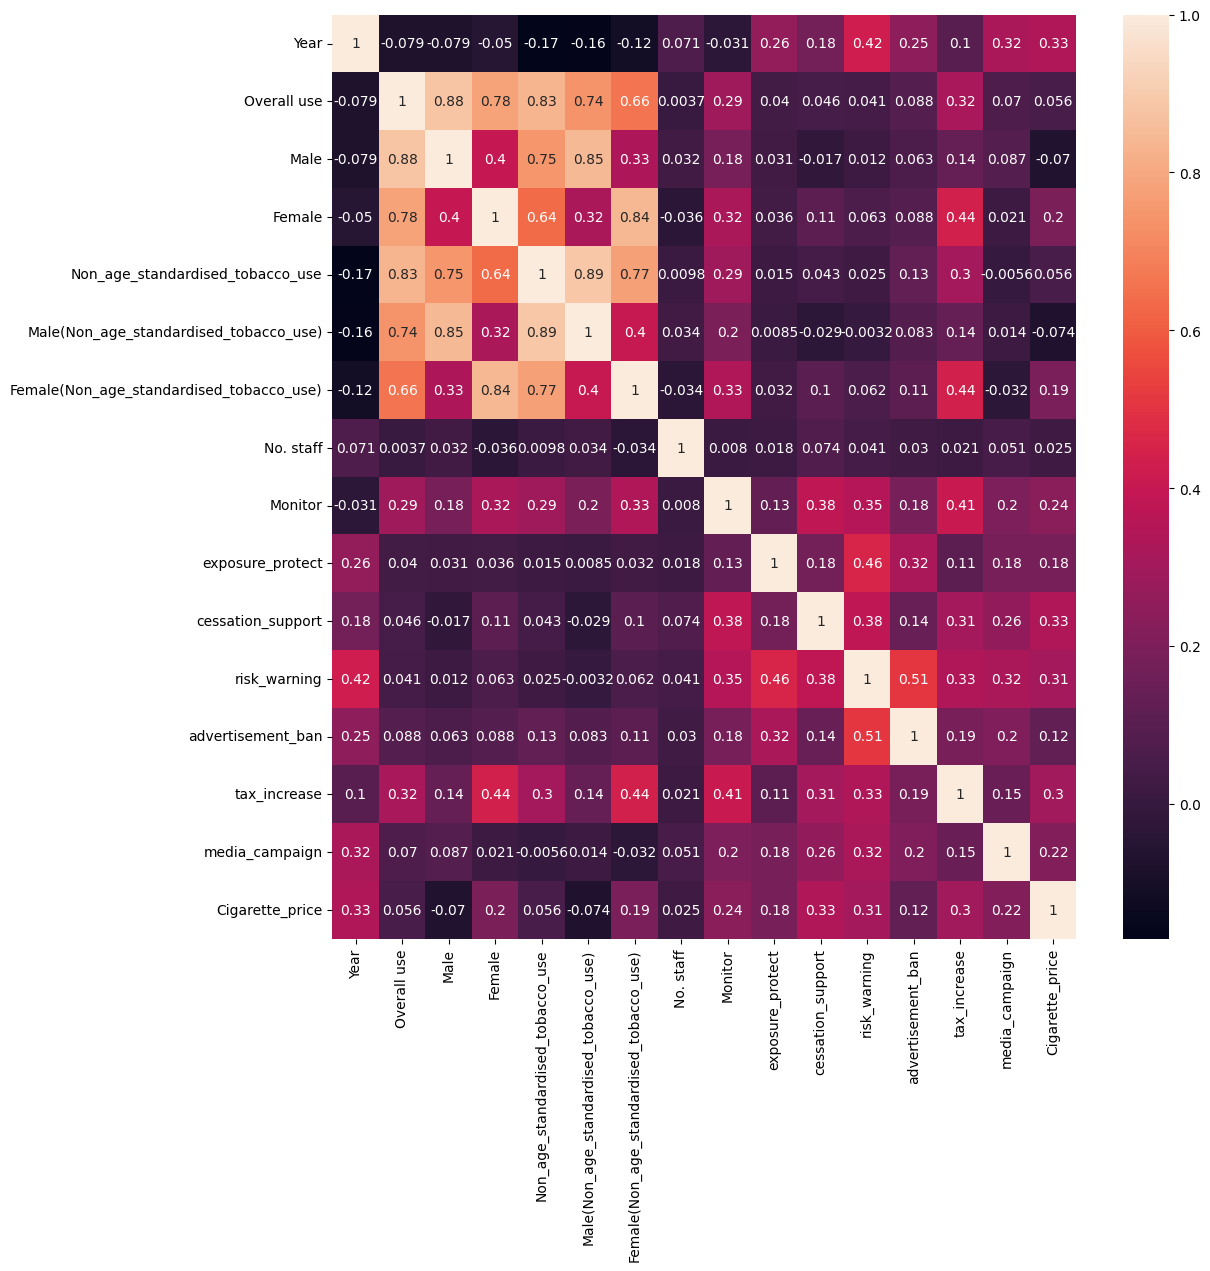

In [ ]:
#display a correlation heatmap
heatmap_df = merged.drop(columns=['Region', 'Objectives exist', 'Ntl agency exists', 'Continental Classification', 'Income Group'], axis=1)
heatmap_df_corr = heatmap_df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(heatmap_df_corr, annot= True, ax=ax, cmap ='rocket');

## **Checking the validity of interpolating our target variables**

In [ ]:
#In order to check if interpolation was a valid method for filling in our missing values for our tobacco use columns we compared interpolated values for 2022 with the
#real values for 2022

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tobacco Project/Cleaned data/CleanAgeStandardised.csv')

In [ ]:
df = df.drop(df[df.Year > 2022].index)
df = df.drop(df[df.Year < 2007].index)
df = df.drop(df[df.Year == 2021].index)
df = df.drop(['Male', 'Female'], axis = 1)

In [ ]:
Real2020 = df[df['Year'] == 2020]
Pred = df.drop(df[df.Year == 2020].index)

In [ ]:
year = [2020]

# Create a DataFrame with all combinations of 'Country' and 'Year'
countries = Pred['Region'].unique()
all_combinations = pd.MultiIndex.from_product([countries, year], names=['Region', 'Year'])
complete_df = pd.DataFrame(index=all_combinations).reset_index()

# Merge with the original data
Pred2020 = complete_df.merge(Pred, on=['Region', 'Year'], how='outer')

In [ ]:
Pred2020.head(10)

,Region,Year,Overall use
0,Afghanistan,2007,32.5
1,Afghanistan,2010,30.2
2,Afghanistan,2015,26.6
3,Afghanistan,2020,NaN
4,Afghanistan,2022,22.7
5,Albania,2007,30.2
6,Albania,2010,28.3
7,Albania,2015,25.4
8,Albania,2020,NaN
9,Albania,2022,21.9


In [ ]:
# Group by 'Country', interpolate each column separately, and reset index to avoid issues
Pred2020['Overall use'] = (
    Pred2020.groupby('Region', group_keys=False)['Overall use']
    .transform(lambda x: x.interpolate(method = 'linear', limit_direction='both'))
    .reset_index(drop=True)
)

# Optional: Forward-fill and backward-fill for remaining NaNs
#Pred2022['Overall use'] = Pred2022.groupby('Region', group_keys=False)['Overall use'].apply(lambda x: x.ffill().bfill()).reset_index(drop=True)

In [ ]:
Pred2020.head(20)

,Region,Year,Overall use
0,Afghanistan,2007,32.50
1,Afghanistan,2010,30.20
2,Afghanistan,2015,26.60
3,Afghanistan,2020,24.65
4,Afghanistan,2022,22.70
5,Albania,2007,30.20
6,Albania,2010,28.30
7,Albania,2015,25.40
8,Albania,2020,23.65
9,Albania,2022,21.90


In [ ]:
compare = pd.merge(Real2020, Pred2020, on=['Region', 'Year'])
compare['diff'] = compare['Overall use_x'] - compare['Overall use_y']
print(compare['diff'].mean())
print(compare['diff'].max())

-0.5696969696969697
0.4499999999999993
